# Finding optimal adjustment sets

This notebooks illustrates the use of the package on the examples included in [Smucler, Sapienza and Rotnitzky (2021)](https://doi.org/10.1093/biomet/asab018) and Smucler and Rotnitzky (2022)

### Preliminaries

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
from optimaladj.CausalGraph import CausalGraph

Consider the design of the following hypothetical observational study discussed in [Shrier & Platt (2008)](https://doi.org/10.1186/1471-2288-8-70). The aim of the study is to assess the
effect of warm-up exercise on injury after playing sports. Suppose that a researcher postulates
that the graph below represents a causal graphical model. The vertex warm-up is the treatment variable, which stands for the type of exercise an athlete performs prior to playing sports,
and the vertex injury stands for the outcome variable. Suppose that the goal is to estimate and
compare the interventional means corresponding to different dynamic treatment regimes. Each
regime prescribes the type of warm-up exercise as a function of previous injury and team motivation. Suppose that due to practical limitations, the variables genetics, pre-grame proprioception,
intra-game proprioception and tissue weakness cannot be measured.

To build the graph, we declare $\mathcal{G}$ to be an object of class ```CausalGraph``` and then add the corresponding edges. Since ```CausalGraph``` inherits from networkx's ```DiGraph``` building an object of class ```CausalGraph``` works exactly the same as building an object of class ```DiGraph```.

In [22]:
G = CausalGraph()
G.add_edges_from([('coach', 'team motivation'),
                  ('coach', 'fitness'),
                  ('fitness', 'pre-game prop'),
                  ('fitness', 'neuromusc fatigue'),
                  ('team motivation', 'warm-up'),
                  ('team motivation', 'previous injury'),
                  ('pre-game prop', 'warm-up'),
                  ('warm-up', 'intra-game prop'), 
                  ('contact sport', 'previous injury'),
                  ('contact sport', 'intra-game prop'),
                  ('intra-game prop', 'injury'),
                  ('genetics', 'fitness'),
                  ('genetics', 'neuromusc fatigue'),
                  ('genetics', 'tissue disorder'),
                  ('tissue disorder', 'neuromusc fatigue'), 
                  ('tissue disorder', 'tissue weakness'),
                  ('neuromusc fatigue', 'intra-game prop'),
                  ('neuromusc fatigue', 'injury'),
                  ('tissue weakness', 'injury')])

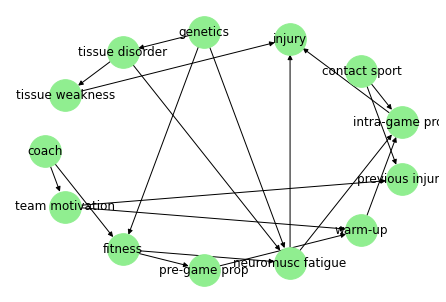

In [23]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

Next, we define the treatment and outcome variables, the variables that will be used to allocate treatment ($L$) and the observable variables ($N$).

In [24]:
treatment = 'warm-up'
outcome = 'injury'
L = ['team motivation', 'previous injury']
N = ['team motivation', 'previous injury', 'warm-up', 'coach', 'fitness', 'contact sport', 'neuromusc fatigue', 'tissue disorder', 'injury']

To find the optimal, optimal minimal and optimal minimum adjustment set, we use the ```optimal_adj_set```, ```optimal_minimal_adj_set``` and ```optimal_minimum_adj_set``` methods from the ```CausalGraph``` class.

In [25]:
G.optimal_adj_set(treatment, outcome, L, N)

{'contact sport',
 'neuromusc fatigue',
 'previous injury',
 'team motivation',
 'tissue disorder'}

In [26]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

{'neuromusc fatigue', 'previous injury', 'team motivation', 'tissue disorder'}

In [27]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

{'fitness', 'previous injury', 'team motivation'}

Smucler, Sapienza and Rotnitzky (2021) show that when an optimal adjustment set exists it can be found as the set of neighbours of the outcome variable in an undirected graph, which they call $\mathcal{H}^{1}$, constructed from the original graph $\mathcal{G}$. Moreover, the optimal minimal adjustment set is the subset neighbours of the outcome variable in $\mathcal{H}^{1}$ that have at least one path in $\mathcal{H}^{1}$ to the treatment variable that does not intersect any other neighbours of the treatment variable. 

This graph may be of independent interest, since Smucler, Sapienza and Rotnitzky (2021) show that the set of minimal vertex cuts between the treatment and outcome variables in $\mathcal{H}^{1}$ is equal to the set of minimal adjustment sets in $\mathcal{G}$. Moreover, they show that the set of minimal vertex cuts in $\mathcal{H}^{1}$ can be endowed with a lattice structure in such a way that the if one minimal vertex cuts $Z_1$ is smaller in this lattice than another minimal vertex cut $Z_2$, then the asymptotic variance of any non-parametric estimator of the interventional mean that adjusts for $Z_{1}$ is smaller than the asymptotic variance of any non-parametric estimator of the interventional mean that adjusts for $Z_{2}$.


The ```build_H1``` method of the ```CausalGraph``` class computes the $\mathcal{H}^{1}$  graph associated with $\mathcal{G}$ .

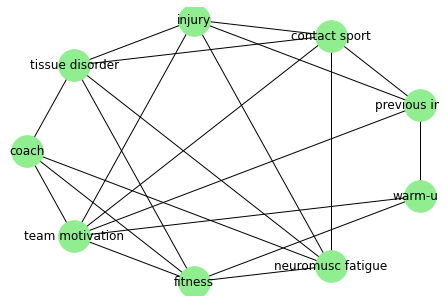

In [28]:
H1 = G.build_H1(treatment, outcome, L, N)
nx.draw_shell(H1, with_labels=True, node_color='lightgreen', node_size = 1000)

### An example in which sufficient conditions to guarantee the existance of an optimal adjustment set do not hold

For the graph below, it can be shown that the sufficient conditions to guarantee the existance of an optimal adjustment set introduced in Smucler, Sapienza and Rotnitzky (2021) do not hold. In this case, calling the ```optimal_adj_set``` method will raise in error. In fact, in this case it can be shown that actually an observable optimal adjustment set does not exist. However, optimal minimal and optimal minimum observable adjustment sets always exist, as long as there exists at least one adjustment set comprised of observable variables. For this graph, the optimal minimal and the optimal minimum adjustment sets are equal to the empty set.

In [29]:
treatment = 'A'
outcome = 'Y'

L = []
N = ['A', 'Y', 'Z1', 'Z2']

G = CausalGraph()
G.add_edges_from([('A', 'Y'),
                  ('Z1', 'A'),
                  ('Z1', 'Z2'),
                  ('U', 'Z2'),
                  ('U', 'Y')])

In [30]:
G.optimal_adj_set(treatment, outcome, L, N)

ConditionException: Conditions to guarantee the existence of an optimal adjustment set are not satisfied

In [ ]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

In [ ]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

### An example in which there are no observable adjustment sets

In the graph below there are no adjustment sets comprised of only observable variables. In this setting, calling ```optimal_adj_set```,
 ```optimal_minimal_adj_set``` or ```optimal_minimum_adj_set``` will raise an error.

In [ ]:
treatment = 'A'
outcome = 'Y'

L = []
N = ['A', 'Y']


G = CausalGraph()
G.add_edges_from([('U', 'A'),
                    ('A', 'Y'),
                    ('U', 'Y')])

In [ ]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

In [ ]:
G.optimal_adj_set(treatment, outcome, L, N)

In [ ]:
G.optimal_minimal_adj_set(treatment, outcome, L, N)

In [ ]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

### An example with costs

This is the graph in Figures 1, 2 and 3 of Smucler and Rotnitzky (2022). Here we assume that there are positive costs associated to observable variables.

In [31]:
G = CausalGraph()
costs = [
    ("X", {"cost": 1}),
    ("B", {"cost": 2}),
    ("K", {"cost": 4}),
    ("Q", {"cost": 1}),
    ("R", {"cost": 1}),
    ("T", {"cost": 1}),
]
L = ["X"]
N = ["A", "Y", "X", "B", "K", "Q", "R", "M", "T", "F"]
treatment = "A"
outcome = "Y"
G.add_nodes_from(costs)
G.add_edges_from(
    [
        ("X", "A"),
        ("A", "M"),
        ("K", "A"),
        ("B", "K"),
        ("Q", "K"),
        ("B", "R"),
        ("Q", "T"),
        ("R", "Y"),
        ("M", "Y"),
        ("T", "Y"),
        ("U", "Y"),
        ("U", "F"),
    ]
)

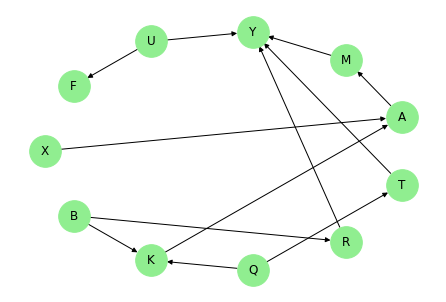

In [32]:
nx.draw_shell(G, with_labels=True, node_color='lightgreen', node_size = 1000)

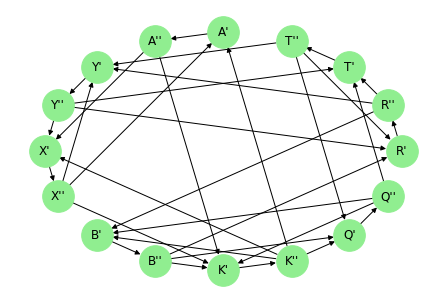

In [37]:
# Construct the flow network associated with G define in Smucler and Rotnitzky (2022) and plot it
D = G.build_D(treatment, outcome, L, N)
nx.draw_shell(D, with_labels=True, node_color='lightgreen', node_size = 1000)

In [34]:
G.optimal_mincost_adj_set(treatment, outcome, L, N)

{'R', 'T', 'X'}

In [35]:
G.optimal_minimum_adj_set(treatment, outcome, L, N)

{'K', 'X'}